<a href="https://colab.research.google.com/github/JuanCruzArese/TP-Final-ICD/blob/laburen-aca/TP_Final_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JuanCruzArese/TP-Final-ICD
%cd TP-Final-ICD

Cloning into 'TP-Final-ICD'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 1.12 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/TP-Final-ICD


## Importar librerias

In [2]:
import pandas as pd # Para manejo de DataFrames
import numpy as np
import matplotlib.pyplot as plt # Para control de figuras
import seaborn as sns # Para visualizaciones (boxplot, heatmap)

from sklearn.model_selection import train_test_split, GridSearchCV # Para dividir datos en train/test y busqueda de grilla.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # Para escalado robusto
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression # Modelo Regresión Logística
from sklearn.ensemble import RandomForestClassifier # Modelo Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (                          # Métricas de evaluación
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay,
                                                       roc_curve, auc
)
from sklearn.feature_selection import SelectKBest, f_classif # Selector y criterio ANOVA F, respectivamente.

## Importar dataset

In [3]:
df = pd.read_csv('/content/TP-Final-ICD/UCI_Credit_Card_TF.csv')

# **EXPLORACION Y ANALISIS DEL DATASET**

### Vistazo al dataframe

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Informacion de las columnas del dataframe (tipo de dato, entradas no nulas, etc.)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29100 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Informacion estadistica del dataframe

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29100.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,28500.000000,2.700000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.489141,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5703.194491,5.975542e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217052,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16691.187697,2.368334e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.100000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2106.500000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5018.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Dimensiones del dataframe

In [7]:
print(df.shape)

(30000, 25)


### Cantidad de clientes de tarjetas de credito

In [8]:
print(len(df))

30000


In [9]:
def get_percentage(default_payment):
  return len(df[df['default.payment.next.month'] == default_payment]) * 100 / len(df)

### Porcentaje de clientes que pagaron

In [10]:
print(get_percentage(0))

77.88


### Porcentaje de clientes que no pagaron

In [11]:
print(get_percentage(1))

22.12


## Visualizacion

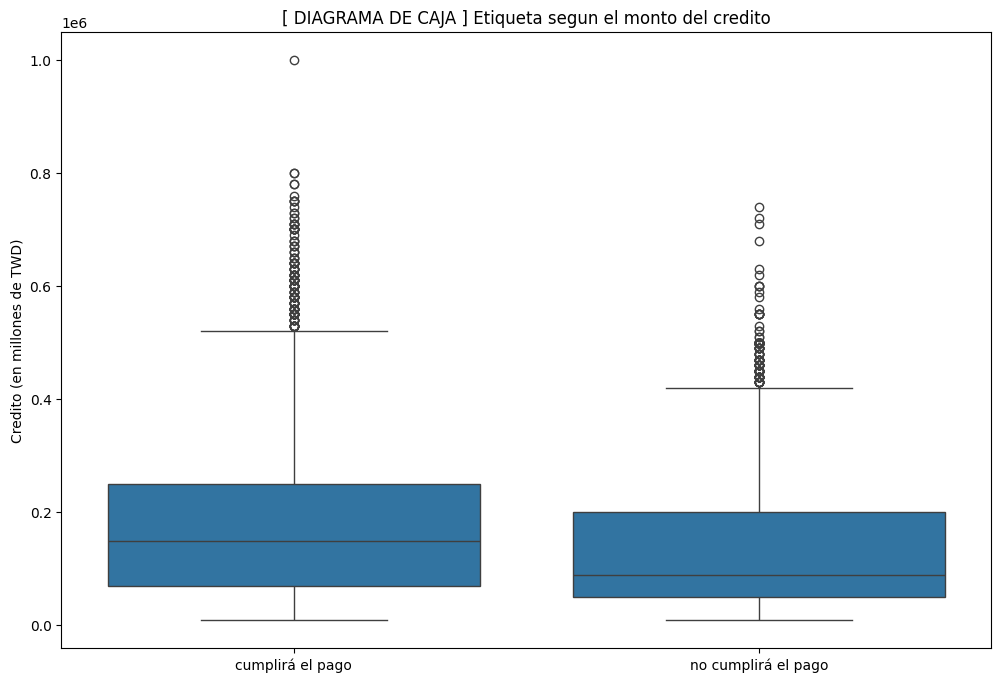

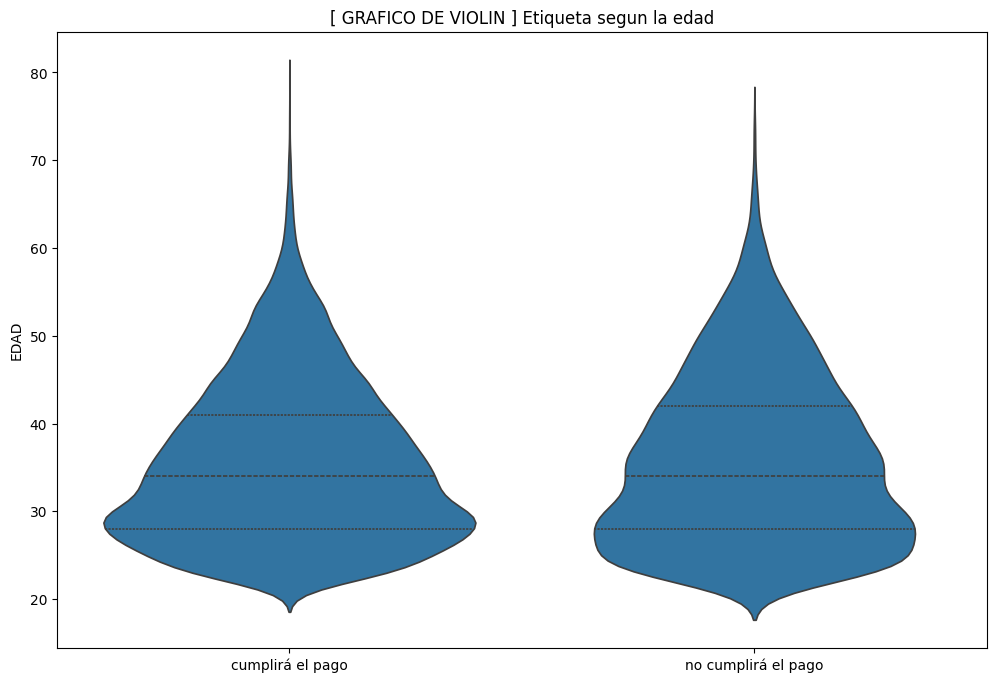

In [12]:
# for column in df.columns:
#   plt.hist(df[column])
#   plt.title(column)
#   plt.show()

def plot(plot, x, y, title, ylabel):
  plt.figure(figsize=(12, 8))

  match plot:
    case 'box':
      sns.boxplot(data=df, x=x, y=y)
    case 'violin':
      sns.violinplot(data=df, x=x, y=y, inner='quartile')

  plt.title(title)
  plt.xlabel('')
  plt.xticks([0, 1], ['cumplirá el pago', 'no cumplirá el pago'])
  plt.ylabel(ylabel)

plot('box', 'default.payment.next.month', 'LIMIT_BAL',
     '[ DIAGRAMA DE CAJA ] Etiqueta segun el monto del credito',
     'Credito (en millones de TWD)')

plot('violin', 'default.payment.next.month', 'AGE',
     '[ GRAFICO DE VIOLIN ] Etiqueta segun la edad',
     'EDAD')

plt.show()

#**LIMPIEZA Y PREPARACION DE LOS DATOS**

# Valores nulos dentro del data set

In [14]:
print(f"\nValores nulos por columna:\n \n{df.isnull().sum()}")


Valores nulos por columna:
 
ID                               0
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                            900
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                      1500
PAY_AMT2                      3000
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default.payment.next.month       0
dtype: int64


Analisis columna AGE

In [15]:
df['AGE'].describe()

,AGE
count,29100.000000
mean,35.489141
std,9.217052
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [18]:
df['AGE'].median()

34.0

<Axes: >

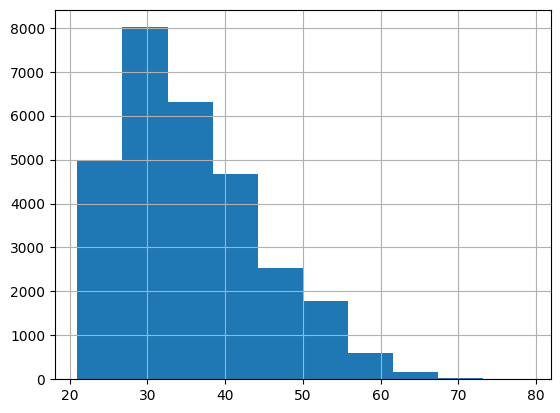

In [21]:
df['AGE'].hist()

Ya que la media(35.48) y la mediana(34) tienen valores muy similares podemos hacer el remplazo de los null por la media. Tambien se podrian haber borrado esas columnas ya que son unicamente el 3% del data set.

In [22]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

In [23]:
df['AGE'].isnull().sum()

np.int64(0)

Analisis columna PAY_AMT1

In [24]:
df['PAY_AMT1'].describe()

,PAY_AMT1
count,28500.000000
mean,5703.194491
std,16691.187697
min,0.000000
25%,1000.000000
50%,2106.500000
75%,5018.250000
max,873552.000000


In [25]:
df['PAY_AMT1'].median()

2106.5

<Axes: >

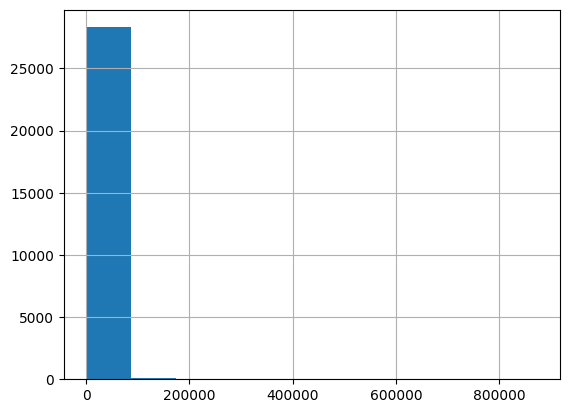

In [26]:
df['PAY_AMT1'].hist()

Ya que tenemos valores muy dispares en la media y la mediana ademas de que el historigrama no no brinda informacion util la mejor opcion es eliminar estas columnas las cuales representan el 5% del data set.

In [27]:
df = df.dropna(subset=["PAY_AMT1"])

In [35]:
df['PAY_AMT1'].isnull().sum()

np.int64(0)

Analisis columna PAY_AMT3

In [29]:
df['PAY_AMT3'].describe()

,PAY_AMT3
count,28500.000000
mean,5271.138035
std,17825.702903
min,0.000000
25%,390.000000
50%,1817.500000
75%,4582.500000
max,896040.000000


In [32]:
df['PAY_AMT3'].median()

1817.5

<Axes: >

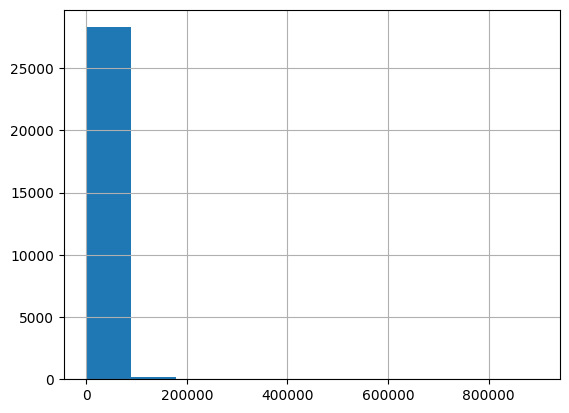

In [33]:
df['PAY_AMT3'].hist()

Nuevamente no contamos con un valor adecuado para hacer el remplazo por ende procedemos a eliminar todos los valores null que representan el 10% del data set.

In [34]:
df = df.dropna(subset=["PAY_AMT3"])

In [36]:
df['PAY_AMT3'].isnull().sum()

np.int64(0)